In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

/anaconda/envs/3point6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [3]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

In [4]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

In [6]:
df.head()

,default,student,balance,income
0,-0.185599,-0.645936,-0.218835,0.813187
1,-0.185599,1.548141,-0.037616,-1.605496
2,-0.185599,-0.645936,0.492410,-0.131212
3,-0.185599,-0.645936,-0.632893,0.164031
4,-0.185599,-0.645936,-0.102791,0.370915


In [7]:
# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

In [8]:
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

In [9]:
# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [10]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

R² for the model with few features:
0.450062579301

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]


In [11]:
# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)


R² for the model with many features:
0.443633767129

Parameter estimates for the model with many features:
[  0.00000000e+00  -3.89351238e-01   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -2.77688887e-04
  -7.09158792e-07   3.48711577e+00]


In [12]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.445532251512
0.438046634591


In [13]:
lassBig.coef_

array([  0.00000000e+00,  -3.89351238e-01,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -2.77688887e-04,  -7.09158792e-07])

# Assignment

Create a plot below of how  R2R2  varies across different values of  λλ  for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same  R2R2  for a given lambda value?

In [14]:
lambdaVec = np.arange(0.1,2.5,0.25)
estimates = np.nan*np.zeros(shape=[len(lambdaVec),len(list(X_train2.columns))+2])
estimatesRidge = np.nan*np.zeros(shape=[len(lambdaVec),len(list(X_train2.columns))+2])

In [15]:
#Run the model for many alphas/lambdas and save results.
for ii in range(0,len(lambdaVec)):
    lambd = lambdaVec[ii]
    
    lassoregrBig = linear_model.Lasso(alpha=lambd)
    lassoregrBig.fit(X_train2, Y_train)
    estimates[ii, :-2] = lassoregrBig.coef_
    estimates[ii, -2] = lambd
    estimates[ii, -1] = lassoregrBig.score(X_train2, Y_train)
    
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    estimatesRidge[ii, :-2] = ridgeregrBig.coef_
    estimatesRidge[ii, -2] = lambd
    estimatesRidge[ii, -1] = ridgeregrBig.score(X_train2, Y_train)
    #estimates = np.row_stack((
    #    estimates,
    #    np.append(lassoregrBig.coef_,[lambd])))

    

In [16]:
# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train2.columns) + ['lambda', 'R2'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

estimatesRidge_df = pd.DataFrame(
    estimatesRidge,
    columns=list(X_train2.columns) + ['lambda', 'R2'])
estimatesRidge_df.sort_values(by='lambda', inplace=True, ascending=True)

# Analyze LASSO coefficients and check how fast they go to zero (depending on lambda)

In [17]:
# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])

In [18]:
varstoplot

['default',
 'student',
 'balance',
 'balance_student',
 'balance_default',
 'student_default',
 'balance_sqrt',
 'balance2',
 'balance3']

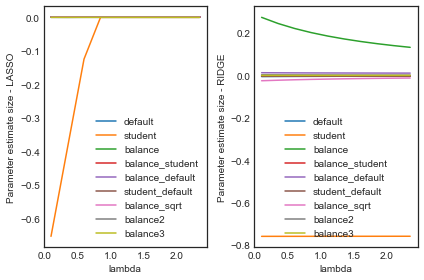

In [19]:
# Plot a line for each parameter.

plt.subplot(1,2,1)
labels = []
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size - LASSO')
plt.legend(labels, loc='best')
plt.tight_layout()

plt.subplot(1,2,2)
labels = []
for var in varstoplot:
    plt.plot(estimatesRidge_df['lambda'], estimatesRidge_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size - RIDGE')
plt.legend(labels, loc='best')
plt.tight_layout()

plt.show()

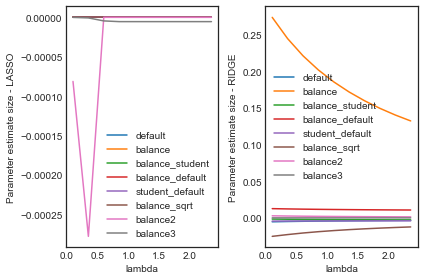

In [20]:
varstoplot.remove('student')

plt.subplot(1,2,1)
labels = []
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size - LASSO')
plt.legend(labels, loc='best')
plt.tight_layout()

plt.subplot(1,2,2)
labels = []
for var in varstoplot:
    plt.plot(estimatesRidge_df['lambda'], estimatesRidge_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size - RIDGE')
plt.legend(labels, loc='best')
plt.tight_layout()

plt.show()

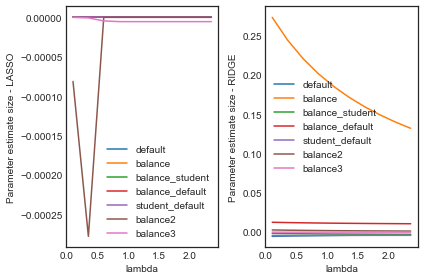

In [21]:
varstoplot.remove('balance_sqrt')

plt.subplot(1,2,1)
labels = []
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size - LASSO')
plt.legend(labels, loc='best')
plt.tight_layout()

plt.subplot(1,2,2)
labels = []
for var in varstoplot:
    plt.plot(estimatesRidge_df['lambda'], estimatesRidge_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size - RIDGE')
plt.legend(labels, loc='best')
plt.tight_layout()

plt.show()

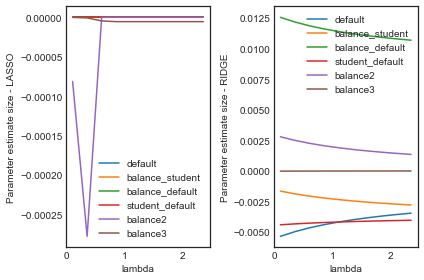

In [22]:
varstoplot.remove('balance')

plt.subplot(1,2,1)
labels = []
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size - LASSO')
plt.legend(labels, loc='best')
plt.tight_layout()

plt.subplot(1,2,2)
labels = []
for var in varstoplot:
    plt.plot(estimatesRidge_df['lambda'], estimatesRidge_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size - RIDGE')
plt.legend(labels, loc='best')
plt.tight_layout()

plt.show()

In [ ]:
# note that the purple line ('balance2') has different sign...!!??

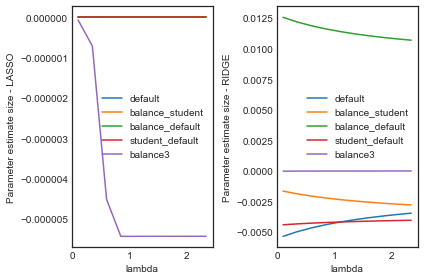

In [23]:
varstoplot.remove('balance2')

plt.subplot(1,2,1)
labels = []
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size - LASSO')
plt.legend(labels, loc='best')
plt.tight_layout()

plt.subplot(1,2,2)
labels = []
for var in varstoplot:
    plt.plot(estimatesRidge_df['lambda'], estimatesRidge_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size - RIDGE')
plt.legend(labels, loc='best')
plt.tight_layout()

plt.show()

In [ ]:
# note that balance3 is important for LASSO, but not important at all for RIDGE, while the balance_default is the opposite
# for RIDGE a bunch of other vars have not-zero values while for LASSO they are zero (sort of as expected)

# compare coefficients between the two regressions, as a function of lambda

In [ ]:
# the coefficients seem to decay faster for LASSO than for RIDGE - which is what you would expect.
# again, 'balance2' has different sign on the coefficients - probably a fluke???!!!

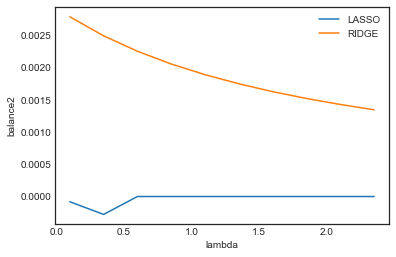

In [24]:
#particularVar = 'student'
# particularVar = 'balance_sqrt'
#particularVar = 'balance_default'
particularVar = 'balance2'
labels = [] 

plt.plot(estimates_df['lambda'], estimates_df[particularVar])
labels.append('LASSO')

plt.plot(estimatesRidge_df['lambda'], estimatesRidge_df[particularVar])
labels.append('RIDGE')


plt.xlabel('lambda')
plt.ylabel(particularVar)
plt.legend(labels)
plt.show()

# compare R2 across lambda

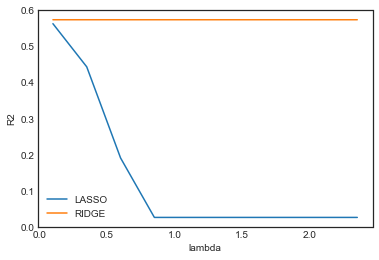

In [25]:
particularVar = 'R2'

labels = [] 

plt.plot(estimates_df['lambda'], estimates_df[particularVar])
labels.append('LASSO')

plt.plot(estimatesRidge_df['lambda'], estimatesRidge_df[particularVar])
labels.append('RIDGE')


plt.xlabel('lambda')
plt.ylabel(particularVar)
plt.legend(labels)
plt.show()

In [ ]:
# higher lambda seems to lead to easy exclusion of features 
#(it becomes easier to just demean the data than actually fit anything)
# can you solve the L1 problem in a different way than with the Coordinate Descent Algorithm?